In [41]:
from dotenv import load_dotenv
import os
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import HumanMessage , SystemMessage
from langchain.prompts import PromptTemplate


In [2]:
load_dotenv()

True

In [3]:
os.environ["GOOGLE_API_KEY"]=os.getenv("GOOGLE_API_KEY")

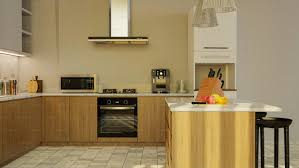

In [4]:
import PIL.Image as Image
img = Image.open('kitchen.jpg')
img

In [49]:
llm = ChatGoogleGenerativeAI(
    model='gemini-pro-vision'
)


In [6]:
name = "Parthiv"
type = "dementia patient"
location = "India"
house = "Multistoried apartment"

In [33]:
response.content

"```python\n['person', 'car', 'bicycle', 'motorcycle', 'bus', 'train']\n```"

In [50]:

message = HumanMessage(
    content=[
        {
            "type" : "text" , 
            "text" : f""" 
            You're an expert in detecting any kind of risk that could be harmful to a dementia patient by analysing images of the house where the patient lives. While generating response keep the role of
            the user for patient , their location and type of house they live in mind \n

            Hi , I'm {name} and I'm a {type} . I live in {location} in a {house}.
            
            Is their any risk for a dementia patient in the given pictures. Analyse each image and generate seperate resposne for each image separately. ? If yes , then what are those ?And suggest how can this risk might be avoided ? Generate a detailed report.
            """

        },
        {
            "type" : "image_url",
            "image_url" : "./kitchen.jpg"
        }
    ]
)

object_detection_prompt = HumanMessage(
    content=[
        {
            "type" : "text" , 
            "text" : "What are the objects you can detect in the given image ? Send the name of those objects in a list"
        } , 
        {
            "type" : "image_url",
            "image_url" : "./kitchen.jpg"
        }
    ]
)
response = llm.invoke([message])

print(response.content)

 Hello Parthiv, I understand you're a dementia patient living in a multistoried apartment in India. Dementia can indeed be challenging, but with the right precautions, you can live safely and comfortably in your home. Let's take a look at your kitchen and identify potential risks:

1. **Stove:** The stove is a major source of risk in the kitchen. Always ensure that the stove is turned off after use. Consider installing a stove knob cover to prevent accidental ignition.

2. **Microwave:** The microwave can also be a hazard if not used properly. Always ensure that food is heated evenly and that the microwave door is closed properly before starting it.

3. **Knives:** Keep sharp knives out of reach. Store them in a locked drawer or cabinet.

4. **Electrical appliances:** Ensure that all electrical appliances are in good condition and that cords are not frayed.

5. **Clutter:** Keep the kitchen free of clutter, as this can increase the risk of falls.

6. **Lighting:** Ensure that the kitch

In [47]:
llm = ChatGoogleGenerativeAI(model='gemini-pro')
prompt_text = f"""   
    You're an expert in detecting any kind of risk that could be harmful to a dementia patient by analysing images of the house where the patient lives. While generating response keep the role of
    the user for patient , their location and type of house they live in mind.

    Please identify the objects from {response.content} which can cause risk for a dementia patient . For each risky object give a detail report on how those objects can cause risk to the patient and give sueggestion to avoid those risks . Please don't generate any content for non-risky objects.
"""
llm.invoke(prompt_text).content

'**Object:** Knife\n\n**Risk:** Dementia patients may not be aware of the danger of sharp objects and could accidentally cut themselves.\n\n**Suggestion:** Keep knives out of reach of dementia patients, either in a locked cabinet or on a high shelf.\n\n**Object:** Cooktop\n\n**Risk:** Dementia patients may forget that the cooktop is on and leave it unattended, which could lead to a fire.\n\n**Suggestion:** Install a stove alarm that will sound if the cooktop is left on for a certain amount of time.\n\n**Object:** Curtains\n\n**Risk:** Dementia patients may get tangled in curtains and fall, or they may pull the curtains down and break something.\n\n**Suggestion:** Choose curtains that are made of a lightweight fabric that is not likely to tangle, and make sure that they are securely fastened to the wall.'

In [13]:
from langchain_chroma import Chroma
from langchain_text_splitters import CharacterTextSplitter
from langchain_community.embeddings.sentence_transformer import SentenceTransformerEmbeddings
splitter = CharacterTextSplitter(
    chunk_size = 500 ,
    chunk_overlap = 50
)
splitted_text = splitter.split_text(response.content)
embedding_function = SentenceTransformerEmbeddings(model_name = "all-MiniLM-L6-v2")

db = Chroma.from_texts(splitted_text , embedding=embedding_function)



In [28]:
splitted_text = splitter.split_text(response.content)
# new_embeddings = embedding_function(splitted_text)
db.add_texts(texts=splitted_text)

['501b5977-66ea-41c4-8679-39ad09819ad8',
 '8a4e6068-ec2b-4016-889f-b4087583006a',
 '8510b19c-6a96-4074-b890-6236231869a0',
 '6cbc733a-ecbd-4181-b7ec-61c0165307f5']

In [29]:
query = "What are the risks a dementia patient can have in a kitchen ?"
results = db.similarity_search_with_relevance_scores(query=query , k=3)
results

[(Document(page_content='Hello Parthiv, \n\nI understand that you are a dementia patient living in a multistoried apartment in India. I am happy to help you identify any potential risks in your home that could be harmful to you.\n\nThe kitchen is a potentially dangerous place for someone with dementia. There are many sharp objects, hot surfaces, and electrical appliances that could cause injury. It is important to keep the kitchen clean and free of clutter, and to make sure that all appliances are in good working order.'),
  0.6990974219440509),
 (Document(page_content='* Making sure that the home is well-lit\n* Installing grab bars in the bathroom\n* Using non-slip mats in the shower and bathtub\n* Keeping sharp objects out of reach\n* Putting locks on cabinets and drawers that contain dangerous items\n* Having a fire extinguisher on hand\n* Making sure that the home is smoke-free\n\nBy taking these steps, you can help to create a safe and comfortable home environment for your loved o